In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
 df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
df = df.drop('Serial No.',axis=1)


 

In [6]:
df.shape

(500, 8)

In [7]:
from sklearn.preprocessing import Binarizer

In [8]:
bi = Binarizer(threshold=0.75)
df["Chance of Admit "] = bi.fit_transform(df[['Chance of Admit ']])

In [9]:
 df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1.0
1,324,107,4,4.0,4.5,8.87,1,1.0
2,316,104,3,3.0,3.5,8.00,1,0.0
3,322,110,3,3.5,2.5,8.67,1,1.0
4,314,103,2,2.0,3.0,8.21,0,0.0


In [10]:
 df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [18]:
x= df.drop('Chance of Admit ',axis=1)


y = df['Chance of Admit ']
y = y.astype('int') # y float is converted into y

<Axes: xlabel='Chance of Admit ', ylabel='count'>

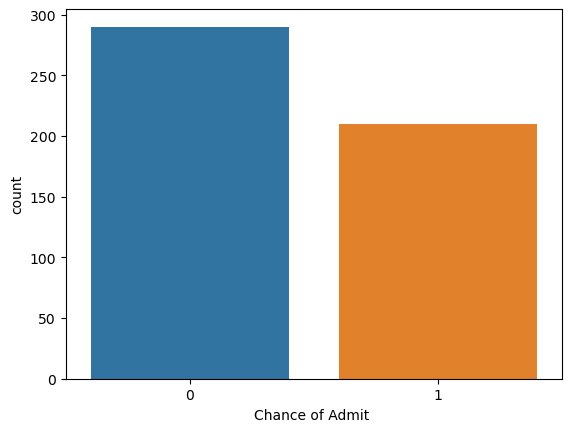

In [30]:
 sns.countplot(x=y)

In [33]:
y.value_counts()

Chance of Admit 
0    290
1    210
Name: count, dtype: int64

In [35]:
 from sklearn.model_selection import train_test_split

In [36]:
x_train , x_test,y_train , y_test = train_test_split(x,y , random_state=0,test_size=0.25)

In [37]:
x_train.shape

(375, 7)

In [38]:
y_train.shape

(375,)

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
classifier = DecisionTreeClassifier(random_state=0)

In [41]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [42]:
y_predict=classifier.predict(x_test)

In [43]:
y_predict


array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0])

In [45]:
result = pd.DataFrame({
    'actual':y_test,
    'predicted':y_predict
})

In [46]:
result

,actual,predicted
90,0,0
254,1,1
283,1,0
445,1,1
461,0,0
...,...,...
430,0,0
49,1,0
134,1,1
365,1,1


In [47]:
from sklearn.metrics import ConfusionMatrixDisplay , accuracy_score,classification_report

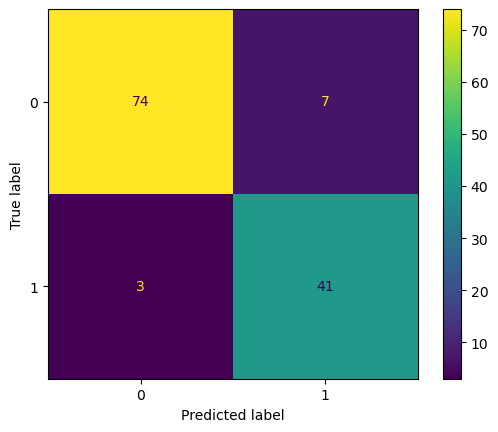

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

In [50]:
accuracy_score(y_test,y_predict)

0.92

In [51]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94        81
           1       0.85      0.93      0.89        44

    accuracy                           0.92       125
   macro avg       0.91      0.92      0.91       125
weighted avg       0.92      0.92      0.92       125



In [54]:
new =[[3,322,110,3,3.5,2.5,8.67,1,1.0]]

In [53]:
new

[[3, 322, 110, 3, 3.5, 2.5, 8.67, 1, 1.0]]

In [55]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

[Text(0.5740131578947368, 0.9583333333333334, 'CGPA <= 8.735\ngini = 0.493\nsamples = 375\nvalue = [209, 166]\nclass = Na'),
 Text(0.3190789473684211, 0.875, 'GRE Score <= 318.5\ngini = 0.211\nsamples = 217\nvalue = [191, 26]\nclass = Na'),
 Text(0.19078947368421054, 0.7916666666666666, 'CGPA <= 8.25\ngini = 0.103\nsamples = 183\nvalue = [173, 10]\nclass = Na'),
 Text(0.16447368421052633, 0.7083333333333334, 'gini = 0.0\nsamples = 105\nvalue = [105, 0]\nclass = Na'),
 Text(0.21710526315789475, 0.7083333333333334, 'SOP <= 4.75\ngini = 0.224\nsamples = 78\nvalue = [68, 10]\nclass = Na'),
 Text(0.11842105263157894, 0.625, 'TOEFL Score <= 99.5\ngini = 0.191\nsamples = 75\nvalue = [67, 8]\nclass = Na'),
 Text(0.05263157894736842, 0.5416666666666666, 'GRE Score <= 307.0\ngini = 0.48\nsamples = 5\nvalue = [3, 2]\nclass = Na'),
 Text(0.02631578947368421, 0.4583333333333333, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Na'),
 Text(0.07894736842105263, 0.4583333333333333, 'University Rating

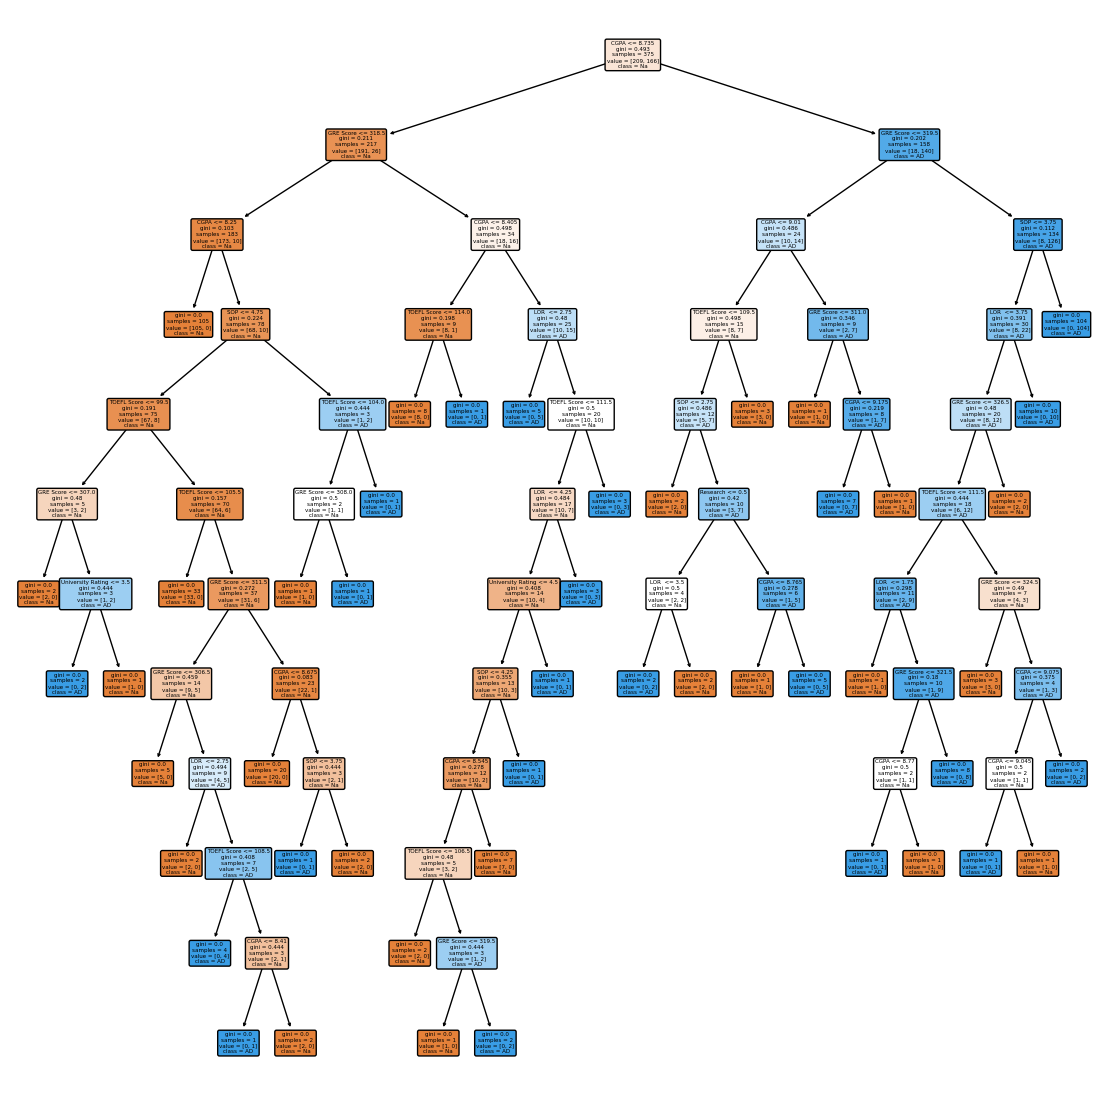

In [60]:
plt.figure(figsize=(14,14))
plot_tree(classifier,fontsize=4,filled=True , rounded=True,feature_names=x.columns,class_names=['Na','AD'])